# CS 580 RYL 3

In [ ]:
# dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import sympy as sp
import scipy
# from PIL import Image

# Zac noted in recitation that we could use official package documentation 
# on the RYL's moving forward'. I did that for this assignment.

In [ ]:
# setup
# The file babyboomerdivorce.csv contains
# data on the rate of baby-boomer divorce.
# The independent variables are marriage age (x) and years of school (y).

df = pd.read_csv("./babyboomerdivorce.csv")
x = df.age_at_marriage.values
y = df.years_of_education.values
z = df.divorce_rate_per_100.values

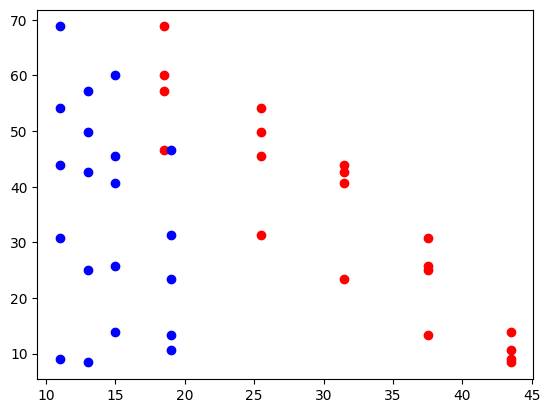

In [3]:
# visualize
plt.scatter(x, z, color="r")
plt.scatter(y, z, color="b")

In [4]:
# A
# (a) Formulate regression problems for the following models:
# z(x,y) = θ00 + θ10x+ θ01y
# z(x,y) = θ00 + θ10x+ θ01y+ θ11xy
# z(x,y) = θ00 + θ10x+ θ01y+ θ11xy+ θ20x2 + θ02y2

ones = np.ones(df.shape[0])
A1 = np.array([ones, x, y]).T
A2 = np.array([ones, x, y, x * y]).T
A3 = np.array([ones, x, y, x * y, x**2, y**2]).T

In [5]:
# B
# (b) Solve each regression and report best-fit parameters and uncertainties.
theta_hat_1, sse1, rank, s = np.linalg.lstsq(A1, z)
theta_hat_2, sse2, rank, s = np.linalg.lstsq(A2, z)
theta_hat_3, sse3, rank, s = np.linalg.lstsq(A3, z)

print("--------------------------------------------------------------------")
print(f"the model for z(x,y) = θ00 + θ10x+ θ01y gives theta_hat:\n{theta_hat_1}")
print(f"SSE is {sse1}")
print("--------------------------------------------------------------------")
print(f"the model for z(x,y) = θ00 + θ10x+ θ01y+ θ11xy gives theta_hat:\n{theta_hat_2}")
print(f"SSE is {sse2}")
print("--------------------------------------------------------------------")
print(f"the model for θ00 + θ10x+ θ01y+ θ11xy+ θ20x2 + θ02y2 gives theta_hat:\n{theta_hat_3}")
print(f"SSE is {sse3}")
print("--------------------------------------------------------------------")

--------------------------------------------------------------------
the model for z(x,y) = θ00 + θ10x+ θ01y gives theta_hat:
[122.18308858  -1.88084719  -1.94914286]
SSE is [387.28474669]
--------------------------------------------------------------------
the model for z(x,y) = θ00 + θ10x+ θ01y+ θ11xy gives theta_hat:
[ 1.67870700e+02 -3.34051530e+00 -5.10001262e+00  1.00666766e-01]
SSE is [250.80275913]
--------------------------------------------------------------------
the model for θ00 + θ10x+ θ01y+ θ11xy+ θ20x2 + θ02y2 gives theta_hat:
[ 1.14478739e+02 -2.17977168e+00 -3.05970381e-02  1.00666766e-01
 -1.87273229e-02 -1.67386364e-01]
SSE is [191.97966108]
--------------------------------------------------------------------


In [6]:
# C
# (c) Compute leave-one-out cross validation error for each model and compare.
name1 = "z(x,y) = θ00 + θ10x+ θ01y" # cross validation error: 2698.0644755999683
name2 = "z(x,y) = θ00 + θ10x+ θ01y+ θ11xy" # cross validation error: 1647.6357933662268
name3 = "θ00 + θ10x+ θ01y+ θ11xy+ θ20x2 + θ02y2" # cross validation error: 1120.1853500339723

for nm, AA in [(name1, A1), (name2, A2), (name3, A3)]:
    print("--------------------------------------------------------------------")
    print(f"leave-one-out cross validation for {nm}")
    errs = []
    for i in range(AA.shape[0]):
        tmp_a = np.concatenate([AA[:i], AA[i+1:]])
        left_out_a = AA[i]
        tmp_z = np.concatenate([z[:i], z[i+1:]])
        left_out_z = z[i]
        theta_hat_tmp, _, _, _ = np.linalg.lstsq(AA, z)
        err = np.linalg.norm((tmp_z-np.matmul(tmp_a, theta_hat_tmp))**2, ord=2)
        errs.append(err)
    tot_err = sum(errs)
    print(f"cross validation error: {tot_err}")
    print("--------------------------------------------------------------------")

# Comparison: 
# Here we find that the larger-dimensional bases give improved error in cross-validation.
# This suggests that these models with more parameters generalize better.


--------------------------------------------------------------------
leave-one-out cross validation for z(x,y) = θ00 + θ10x+ θ01y
cross validation error: 2698.0644755999683
--------------------------------------------------------------------
--------------------------------------------------------------------
leave-one-out cross validation for z(x,y) = θ00 + θ10x+ θ01y+ θ11xy
cross validation error: 1647.6357933662268
--------------------------------------------------------------------
--------------------------------------------------------------------
leave-one-out cross validation for θ00 + θ10x+ θ01y+ θ11xy+ θ20x2 + θ02y2
cross validation error: 1120.1853500339723
--------------------------------------------------------------------


In [ ]:
# D
# (d) Solve the model z(x,y) = θ00 + θ10x+ θ01y using the 1-norm. Report parameters.

# up to now we have been solving for theta with least squares:
theta_hat_eg = ((A1.T@A1)**-1)@A1.T@z
# because the above is not numerically stable, we solve with numpy:
theta_hat_eg, _, _, _ = np.linalg.lstsq(A1, z)

# however, the expression `((A1.T@A1)**-1)@A1.T@z` is derived using the L-2 norm.
# If we want a solution based on a different norm, we need a different strategy
# z(x,y) = θ00 + θ10x+ θ01y is linear, so I think a closed-form expression could
# be derived using matrix calculus as with the least-squares solution
# I tried to work this out by hand, but couldn't find the solution.
# I can also find the value algorithmically as follows.
# this will not be absolutely precise, but will achieve a practical level of certainty.

def normed_err_from_thetas(thet):
    """ objective function to minimize """
    z_est = np.matmul(A1, thet)
    e_vec = z-z_est
    normed_e = np.linalg.norm(e_vec, ord=1)
    return normed_e

# use theta_hat_1 as the initial value for scipy's optimization algorithm
norm1_theta_hat_1 = scipy.optimize.minimize(normed_err_from_thetas, theta_hat_1).x

print(f"My solution is {norm1_theta_hat_1}")



My solution is [126.13757252  -1.77509354  -2.37689689]
